## Network Science Project 1
### Autumn 2021
### Due: November 5th, 4:00pm GMT

Name: Yuning Li            
CID: 01868678

Please enter your name and 8-digit college ID in the cell above

In [1]:
# Do not modify this cell or import any other modules
# without the instructor's permission. 
# You should run this cell before running the code below.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics import roc_auc_score as auc
#You may also use scipy as needed

### Overview

When collecting data used to construct large complex networks, it can be a substantial challenge to capture all links in the network. The development of methods to identify "missing" links in networks is an important and active area of research. A simple but effective method for link prediction is based on node similarity. The basic idea is: the higher the similarity of a pair of unlinked nodes, the more likely that a link between the nodes was missed during data collection. In this project you will work with codes for link prediction based on two node similarity measures: the cosine similarity and the number of common neighbors.

You should assume that we are working with simple graphs (undirected graphs with no self-loops or multiedges) throughout this project. You should also assume that graph nodes are numbered from $0$ to $N-1$ where $N$ is the number of nodes in the graph. You have been provided with a file, *Project1.txt*, which contains data for a graph which is loaded in a cell below and which you should use throughout the assignment.

In [2]:
def function1(A):
    """Function for question 1) below
    Input:
    A: Adjacency matrix
    
    Output:
    out1,out2,out3: To be described in answer to question below
    """
    A2 = A.dot(A)
    N = A.shape[0]
    out1,out2 = np.triu_indices(N,k=1)
    out3 = A2[out1,out2]
    
    return out1,out2,out3

#Load NetworkX graph from provided file and ensure nodes are numbered from 0 to 1
G = nx.read_edgelist('project1.txt',nodetype=int)
N = G.number_of_nodes()
L1 = list(G.nodes())
L2 = list(range(N))
mapping = dict(zip(L1,L2))
G = nx.relabel_nodes(G,mapping)
#------------------------------

#Create adjacency matrix and call function1
A = nx.adjacency_matrix(G).astype(float)
out1,out2,out3 = function1(A)


In [3]:
#Test function1
A1 = np.matrix([[0,1,1,0],[1,0,1,0],[1,1,0,1],[0,0,1,0]])
A2 = A1.dot(A1)
print(A1)
print(A2)
N1 = A1.shape[0]
print(np.triu_indices(N1,k=1))
print(A2[np.triu_indices(N1,k=1)])
print(function1(A1))

[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]
[[2 1 1 1]
 [1 2 1 1]
 [1 1 3 0]
 [1 1 0 1]]
(array([0, 0, 0, 1, 1, 2], dtype=int64), array([1, 2, 3, 2, 3, 3], dtype=int64))
[[1 1 1 1 1 0]]
(array([0, 0, 0, 1, 1, 2], dtype=int64), array([1, 2, 3, 2, 3, 3], dtype=int64), matrix([[1, 1, 1, 1, 1, 0]]))


1) (5 pts) Examine the cell above and explain its functionality. Your explanation should include a clear, concise description of what the output of *function1* is and how it relates to the structure of the graph, $G$. 

*Answer: Out 1 is the row index of the upper triangular matrix without the main diagonal, Out2 is the column index of the upper triangular matrix without the main diagonal. Combine out1 and out2 we get all possible node pairs in G. Use 'k=1' to avoid self loop. Out 3 is entries of upper part of $A^2$ which is the number of walks of length two from nodes i and j  (i and j are corresponding entries in out1 and out2). Out3 is also the matrix of number of common neighbors between node i and j.*


In [4]:
def simFunc(A,k):
    """Compute cosine similarity and number of common neighbors for each distinct pair of nodes in
    graph represented by adjacency matrix A.

    Input:
    A: Adjacency matrix
    k: N-element Numpy array whose ith element contains the degree of node i in the graph

    Output:
    nodePairs: An Lmax x 2 numpy array containing the node numbers for each distinct pair of nodes in
    the graph. nodePairs[i,:] should contain two integers corresponding to two distinct nodes.
    The order of the two nodes and the order of the rows in nodePairs are not important. Here, 
    
    
    s: An Lmax-element numpy array. The ith element should contain the cosine similarity of the two nodes in the 
    ith row of nodePairs
    
    n:An Lmax-element numpy array. The ith element should contain the number of common neighbors of the two nodes in the 
    ith row of nodePairs

    """
    #Use code below as needed
    N = A.shape[0]
    Lmax = int(N*(N-1)/2)
    nodePairs = np.zeros((Lmax,2),dtype=int)
    s,n = np.zeros(Lmax),np.zeros(Lmax)
    #--------------------------
    
    out1, out2, out3 = function1(A)
    
    #Nodepairs labelled by out1 and out2
    nodePairs = np.stack((out1,out2),axis = 1)
    
    #The number of common neighbors
    array1 = np.squeeze(np.asarray(out3))
    n = array1
    
    #The cosine similarity
    for w in range(Lmax):
        i = out1[w]
        j = out2[w]
        s[w] = n[w]/((k[i]*k[j])**(1/2))
         
    return nodePairs,s,n #please do not modify
    

k = np.array(list(nx.degree(G)))[:,1]+1e-12 #We add 1e-12 to each degree to avoid potential divide-by-zero errors
nodePairs,s,n = simFunc(A,k)    
print(nodePairs)

[[  0   1]
 [  0   2]
 [  0   3]
 ...
 [329 330]
 [329 331]
 [330 331]]


In [5]:
#Test simFunc
A1 = np.matrix([[0,1,1,0],[1,0,1,0],[1,1,0,1],[0,0,1,0]])
k1 = np.array([2,2,3,1])
print(simFunc(A1,k1))

(array([[0, 1],
       [0, 2],
       [0, 3],
       [1, 2],
       [1, 3],
       [2, 3]], dtype=int64), array([0.5       , 0.40824829, 0.70710678, 0.40824829, 0.70710678,
       0.        ]), array([1, 1, 1, 1, 1, 0]))


2) (5 pts) Complete the function *simFunc* above so that it efficiently computes the cosine similarity and number of common beighbors for each distinct pair of nodes in the graph represented by the input adjacency matrix, $\rm A$. See the function docstring for further information on the function input and output. The code should only use the variables provided to the function as input. You should design your code to work well for large graphs. You should **not** use any NetworkX functions within *simFunc*, and you should not modify the function input. Provide a brief description of your code in the cell below.

*Answer: By Q1, the tuples of nodePairs are just the combination of out1 and out2 of function1. The number common neighbors of node i and j is the sum of the product of ik th element in A and the kj th element in A, which can be calculated by $A^2$. Therefore n is the array form of matrix out3. The ijth element of cosine similarity can be calculated by its definition and is $n_ij$ divided by root of $k_i$ times $k_j$*



### Link prediction

Link prediction methods can be tested using the following procedure:

1. For a given graph, $G$, select a fraction ($x$) of the links uniformly at random, and remove these links. Call the new graph, $G_2$.
2. Compute the similarity of each node pair in $G_2$.
3. Collect the similarities for each unlinked pair of nodes in $G_2$ in an array, $s$. Ideally, higher similarities should correspond to node pairs that were linked in the original graph, $G$.
4. Assesses the quality of link prediction based on the similarities. This can be done using the AUC measure (code for computing the AUC has been provided below). AUC is a number between 0 and 1. A value of 1 indicates perfect prediction while 0.5 indicates that the prediction is no better than random guessing. No further information about AUC is needed for this assignment, though it is worth learning more about it if you are interested in machine learning where it is widely used.
5. The AUC considers the similarities for all unlinked node pairs in $G_2$, however a simple alternative measure can be useful. Set $m$ to be a positive integer less than or equal to the number of links removed. Compute the fraction ($\phi$) of the $m$ largest similarities which correspond to node pairs which were linked in $G$ but are unlinked in $G_2$. The closer this fraction is to 1, the better the method has performed in indentifying missing links.

Below, you will develop code to assess the effectiveness of cosine similarity and number of common neighbors for predicting missing links. You will be asked to vary $x$ between $0.1$ and $0.9$, and $m$ will be set to $m=40$. 

Three functions have been provided in the cell below that may be helpful for the questions that follow.



In [6]:
def removeEdges(G,x,seed=True):
    """ Remove int(x*L) edges from G and return 
    modified graph as G2 along with array of removed edges. Here, 
    L is the number of links in G.
    Input:
    G: NetworkX graph
    x: fraction of edges to remove
    seed: when True, same set of edges will be removed with each call
        to function.
    
    Output:
    G2: G with edges removed
    eRemove: Array of removed edges. Each row contains two integers 
            corresponding to a node pair which were connected by a link
            which has been removed.
    """
    if seed: np.random.seed(0) #set seed to True to remove same set of edges each call
  
    L = G.number_of_edges()
    nRemove = int(x*L)
    iRemove = np.random.choice(L,nRemove,replace=False)
    eArray = np.array(list(G.edges()))
    eRemove = eArray[iRemove,:] #edges to be removed

    G2 = G.copy()
    G2.remove_edges_from(eRemove)
    return G2,eRemove


def computeS(G2,eRemove):
    """ 
    Constructs array containing similarities for unlinked node pairs 
    in G2 and computes AUC scores based on similarities
    
    Input:
    G2: graph with removed links
    eRemove: Array of removed edges. Each row contains two elements 
            corresponding to a node pair
    
    Output:
    sArray: Lnon x 3 array where Lnon is number of unlinked node pairs in 
    G2. sArray[i,0] contains the cosine similarity of an unlinked node pair;
    sArray[i,1] contains the number of common neighbors; sArray[i,2] is 1 if the
    node-pair was linked in the original graph and is 0 otherwise.
    
    auc_cos: AUC score based on cosine similarity
    
    auc_cn: AUC score based on common neighbor similarity
    
    """

    A2 = nx.adjacency_matrix(G2).astype(float)
    L2 = G2.number_of_edges()
    k2 = np.array(list(nx.degree(G2)))[:,1]+1e-12 
    
    nodePairs,s,n = simFunc(A2,k2) #compute similarities
    Lmax = s.size
    s = s.reshape(Lmax,1)
    n = n.reshape(Lmax,1)

    #Construct lists of node pairs
    eList_non = set(nx.non_edges(G2))  #unlinked node pairs
    eList_all = list(zip(nodePairs[:,0],nodePairs[:,1])) #all node pairs
    eList_remove = set(zip(eRemove[:,0],eRemove[:,1])) #unlinked node pairs that were linked in G

  
    #Build sArray as described in docstring 
    Lnon = len(eList_non)
    Lall = len(eList_all)
    Lremove = len(eList_remove)
    sArray = np.zeros((Lnon,3))
    count = 0
    
    for ind,e in enumerate(eList_all):
        if e in eList_remove:
            sArray[count,:] = [s[ind],n[ind],1]
            count = count + 1
        elif e in eList_non:
            sArray[count,:] = [s[ind],n[ind],0]
            count = count +1
            
    auc_cos,auc_cn = auc(sArray[:,2],sArray[:,0]),auc(sArray[:,2],sArray[:,1]) #compute AUC scores
 
    return sArray,auc_cos,auc_cn



def sortS(sArray,col=0):
    """Sorts sArray based on entries in specified column. So a row which contains a
    maximum value of sArray[:,col] will be placed in sSorted[0,:].
    Input: 
    sArray: 2D Numpy array to be sorted
    col: the column by which sArray will be sorted. 

    Output:
    sSorted: The elements of sSorted[:,col] will be nonincreasing
    """
    ind = np.argsort(sArray[:,col])
    ind = ind[-1::-1]
    sSorted = sArray[ind,:]
    return sSorted
    

def testLP(G,x,m=40):   
    """
    Test link prediction methods when the x/L of links in G are randomly removed
    Input:
    G: Graph with no missing links
    x: fraction of links to remove
    m: parameter used to define phi
    
    Output:
    auc_cos: array of AUC scores for cosine similarity-based prediction
    auc_cn: array of AUC scores for common neighbor-based prediction
    phi_cos: array of phi scores for cosine similarity-based prediction
    phi_cn: array of phi scores for common neighbor-based prediction

    Please do not modify the function header or the function input
    """
    
    #G with edges removed and the array of removed edges
    G2,eRemove = removeEdges(G,x,seed=True)
    #Array of cosine similarity, common neighbor and information of connection in G & AUC scores of cosine similarity and common neighbor
    sArray,auc_cos,auc_cn = computeS(G2,eRemove)
    #If m is larger than the number of unlinked nodepairs in G2, set m = the number of unlinked nodepairs in G2
    Stotal = len(sArray)
    sSorted_cosT = sortS(sArray,col=0)
    sSorted_cnT = sortS(sArray,col=1)
    m_cos, m_cn = m, m
    S_cos, S_cn = Stotal, Stotal
    for i in range(Stotal - 1):
        if sSorted_cosT[i,0] == sSorted_cosT[i+1,0]:
            m_cos += 1
            S_cos -= 1
        if sSorted_cnT[i,1] == sSorted_cnT[i+1,1]:
            m_cn += 1
            S_cn -= 1
    if m > S_cos:
        m_cos = Stotal
    if m > S_cn:
        m_cn = Stotal
    
    #The m largest cosine similarities and common neighbors in sArray
    sSorted_cos = sortS(sArray,col=0)[0:m_cos]
    sSorted_cn = sortS(sArray,col=1)[0:m_cn]
    
    #Number of node pairs which were linked in G but unlinked in G2
    S_cos2 = 0
    S_cn2 = 0
    for i in range(m_cos):
        if sSorted_cos[i,2] == 1:
            S_cos2 +=1
    for i in range(m_cn):
        if sSorted_cn[i,2] == 1:
            S_cn2 +=1
    
    #Phi scores of cosine similarity and common neighbor
    phi_cos = S_cos2/m_cos
    phi_cn = S_cn2/m_cn
    
  
    return auc_cos,auc_cn,phi_cos,phi_cn


In [7]:
def testLP(G,x,m=40):   
    """
    Test link prediction methods when the x/L of links in G are randomly removed
    Input:
    G: Graph with no missing links
    x: fraction of links to remove
    m: parameter used to define phi
    
    Output:
    auc_cos: array of AUC scores for cosine similarity-based prediction
    auc_cn: array of AUC scores for common neighbor-based prediction
    phi_cos: array of phi scores for cosine similarity-based prediction
    phi_cn: array of phi scores for common neighbor-based prediction

    Please do not modify the function header or the function input
    """
    
    #G with edges removed and the array of removed edges
    G2,eRemove = removeEdges(G,x,seed=True)
    #Array of cosine similarity, common neighbor and information of connection in G & AUC scores of cosine similarity and common neighbor
    sArray,auc_cos,auc_cn = computeS(G2,eRemove)
    #If m is larger than the number of unlinked nodepairs in G2, set m = the number of unlinked nodepairs in G2
    Stotal = len(sArray)
    sSorted_cosT = sortS(sArray,col=0)
    sSorted_cnT = sortS(sArray,col=1)
    n_cos = 0 #number of node pairs which were linked in G but are unlinked in G2
    s_cos = 0 #total number of node pairs in set / index
    m_cos = 1 #number of distinct values
    while m_cos <= m:
        n_cos += sSorted_cosT[s_cos, 2]
        if sSorted_cosT[s_cos,0] != sSorted_cosT[s_cos+1,0]:
            m_cos += 1
        s_cos += 1
        if s_cos == Stotal-1:
            n_cos += sSorted_cosT[s_cos, 2]
            s_cos += 1
            break
    
    n_cn = 0
    s_cn = 0
    m_cn = 1 #number of distinct values
    while m_cn <= m:
        n_cn += sSorted_cnT[s_cn, 2]
        if sSorted_cnT[s_cn,1] != sSorted_cnT[s_cn+1,1]:
            m_cn += 1
        s_cn += 1
        if s_cn == Stotal-1:
            n_cn += sSorted_cnT[s_cn, 2]
            s_cn += 1
            break
    
    
    #phi = (number of node pairs which were linked in G but are unlinked in G2) / (total number of node pairs in set)
    phi_cos, phi_cn = n_cos / s_cos, n_cn / s_cn
    #print(n_cos, s_cos, n_cn, s_cn)
    
    return auc_cos,auc_cn,phi_cos,phi_cn


In [8]:
testLP(G, 0.3, m=40)

<ipython-input-6-a03176a5b73f>:76: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  sArray[count,:] = [s[ind],n[ind],1]
<ipython-input-6-a03176a5b73f>:79: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  sArray[count,:] = [s[ind],n[ind],0]


(0.8910471242934596,
 0.9213449219142409,
 0.05351170568561873,
 0.011916119497914211)

3) (5 pts) Complete *testLP* above so that it i) removes a fraction ($x$) of links from input graph $G$ to create $G_2$, ii) computes the $s$ array containing the cosine similarity and number of common neighbors for each unlinked node pair in $G_2$ along with the AUC scores for both similarities, and iii) computes $\phi$ for both the cosine similarity and number of common neighbors with $m=40$. The function should return the AUC scores for each similarity as well as the $\phi$ fractions for each similarity. Note that *computeS* will calculate AUC scores and the $s$ array for $G_2$.    

4) (5 pts) Add code to the cell below so that it makes two well-designed figures. The first should show how the AUC scores for the two similarities vary with $x$, the fraction of links removed. The second figure should show how the $\phi$ scores for the two similarities vary with $x$. Provide a clear and concise discussion of the trends that you observe. Your discussion should go beyond a simple qualitative description of the curves in your figures and provide some insight into why the trends are what has been observed. Also comment on whether or not $G_{Np}$ graphs would be useful for assessing these link prediction methods.

When analyzing the $\phi$ results for the cosine similarity, it may be helpful to examine the degrees of the nodes that have the highest similarities.

<ipython-input-6-a03176a5b73f>:79: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  sArray[count,:] = [s[ind],n[ind],0]
<ipython-input-6-a03176a5b73f>:76: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  sArray[count,:] = [s[ind],n[ind],1]
<ipython-input-6-a03176a5b73f>:76: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same

<Figure size 432x288 with 0 Axes>

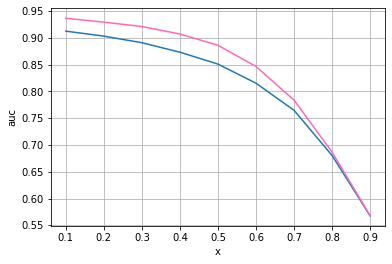

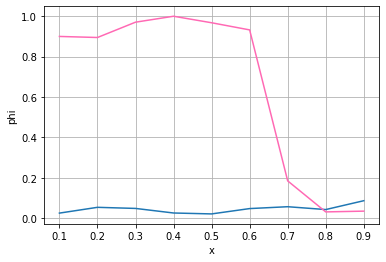

In [9]:
#Add code here
plt.figure()
x_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
auc_cos, auc_cn, phi_cos, phi_cn = [],[],[],[]
for i in range(9):
    x = x_list[i]
    auc_cos_i,auc_cn_i,phi_cos_i,phi_cn_i = testLP(G,x,m=10)
    auc_cos.append(auc_cos_i) 
    auc_cn.append(auc_cn_i)
    phi_cos.append(phi_cos_i)
    phi_cn.append(phi_cn_i)

plt.figure()
plt.plot(x_list,auc_cos)
plt.plot(x_list,auc_cn,c='hotpink')
plt.xlabel("x")
plt.ylabel("auc")
plt.grid()


plt.figure()
plt.plot(x_list,phi_cos)
plt.plot(x_list,phi_cn,c='hotpink')
plt.xlabel("x")
plt.ylabel("phi")
plt.grid()

**Discussion**

*Answer: AUC scores of both cosine similarity and numbers of common neighbors decrease as fraction x increases. The more links removed, it will be harder to identify the original graph.*


*The effectiveness of $\phi$ scores of cosine similarity is much lower than $\phi$ scores of number of common neighbors.As the degrees of the nodes that have the highest similarities are relatively low, the effectiveness of cosine similarity may be affected. Therefore predicting the links by number of common neighbors is more reliable.The effectiveness of $\phi$ scores of common neighbor decrease when x gets larger. That is because the identification of original links will be harder when the number of removed links get larger.*


*$G_{Np}$ graphs would not be useful for assessing these link prediction methods. Because all links are added randomly, the magnitude of similarity would not indicate the probability of whether the unlinked node pairs are connected in the original graph.*



### Further guidance

* You should submit both your completed Jupyter notebook and *either* a pdf version or html version of your notebook (generated using File --- Download as). If you cannot generate a pdf, try installing latex first, or submit an html version instead.
    To submit your assignment, go to the module Blackboard page and click on "Project 1". There will be an option to attach your completed Jupyter notebook and pdf/html file to your submission. (these should be named *project1.ipynb* and *project1.pdf* or *project1.html*). After attaching the notebook, submit your assignment, and include the message, "This is my own work unless indicated otherwise." to confirm that the submission represents your individual work.
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed **except** for question 2) where it should not be used. Please do not any use any other packages without the instructor's permission.
* Marking will be based on the correctness of your work, the efficiency of your code for question 2), and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment. For open-ended questions, we are particularly interested in your ability to identify and explain important properties and trends, and exhaustive descriptions are not needed. While creative ideas based on class material is welcome, you are not expected to base your work on new ideas/concepts/methods that have not been covered (and it is unlikely that credit will be given for such work).
* Open-ended questions require sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor. 
* Questions on the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or by arrangement with your Problem class instructor.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term so far.
